# Lab 1 : PAC Learnability, Hypothesis, Regression

---


Total Points: **100**

Tentative Weightage : **6%**

Submission Deadline :  **$10^{th}$ Feburary 2026 , 10:00 AM**

Submit a separate report to mention any observations asked in the corresponding questions. Without these observations, no points will be provided for the corresponding question.
---

**Important Note:**
Question on Logistic Regression will be shared with you by next week as a "part b" of Assignment 1.

General Instructions:

---



1. You have to do this lab individually
2. You may use **seaborn, matplotlib, pandas, numpy, csv**
3. All the code should be submitted in the form of a single Jupyter notebook itself.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/). You can also run it in your local anaconda jupyter notebook.
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations (report pdf) should be made part of the assignment.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to submit your **observations** (preferably in a separate pdf file) and not just an error free code.
9. Students are expected to follow the **honor code** of the class.
10. The deadline is strict and any assignment submitted later will not
be consider for evaluation unless you take prior permission (at least 4 days before the submission deadline).
11. The marks will be given on the basis of quality of code, use of innovative data structures, scalability, correctness, and completeness of the reported observation.
12. In case of any queries regarding Lab 1, please mail the TAs (emails are provided on the google classroom).

**Best Wishes**


**TASK 1**:                                                      **(10 Marks)**

Create a dataset $\mathcal{D} = (x_i,y_i)_{i=1}^N$ where each $x_i$ is a point in one dimension and each $y_i$ is a binary label i.e. $y_i = \{0,1\}$. First generate the vector $Y$ where each example will take $y_i = 1$ with probability $1/2$ and $y_i = 0$ with probability $1/2$ with $N = 30$. Now fixing the $y_i$, sample the $X$ matrix as follows:


1. If $y_i = 1$ then $x_i \sim \mathcal{N}(3,1)$ where $\mathcal{N}(a,b)$ represent the gaussian distribution with mean $a$ and standard deviation $b$.
    
2. If $y_i = 0$ then $x_i \sim \mathcal{N}(4.5,1)$.
   
  
Implement the following with respect to the above generated dataset:

1. Color code the examples with $y_i = 1$ as red and $y_i=0$ as green and plot the dataset.  **[1 Marks]**
2. Find a threshold hypothesis $\theta$ that minimizes empirical risk. Plot the obtained hypothesis along with the dataset.  **[3 Marks]**
3. What is the optimal threshold hypothesis $\theta^*$ here and provide the generalization error corresponding the same. **[3 Marks]**
4. Plot the empirical error and generalization error for obtained different hypothesis $\theta$s against different value of $N$. Mention what minimum value of $N$ is required to reach $\epsilon$ close to $\theta^*$.  **[3 Marks]**


Write your code by creating cells below.


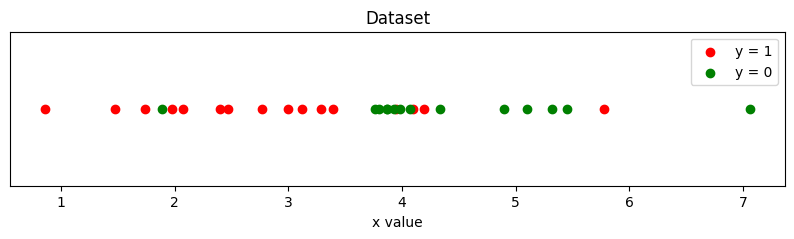

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

N = 30

y = np.random.choice([0, 1], N)

x = []

for i in range(N):
    if y[i] == 1:
        value = np.random.normal(3, 1)
    else:
        value = np.random.normal(4.5, 1)
    x.append(value)

x = np.array(x)

plt.figure(figsize=(10, 2))

plt.scatter(x[y == 1], [0]*len(x[y == 1]), color='red', label='y = 1')
plt.scatter(x[y == 0], [0]*len(x[y == 0]), color='green', label='y = 0')

plt.title("Dataset")
plt.xlabel("x value")
plt.yticks([])
plt.legend()

plt.show()


Theta: 3.43
Empirical risk: 0.17


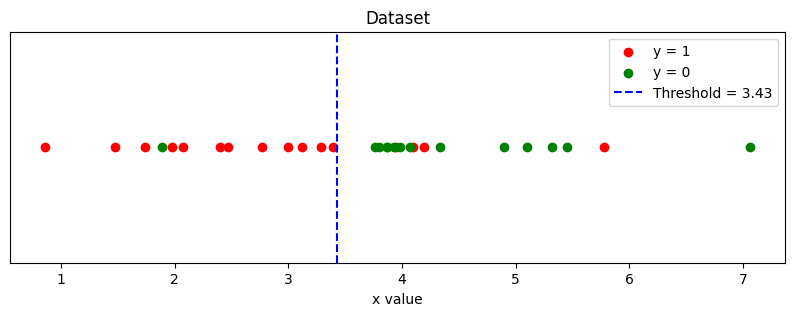

In [2]:
import numpy as np
import matplotlib.pyplot as plt


L = np.linspace(min(x), max(x), 100)

best_error = 9999
best_theta = 0


for theta in L:

    ec = 0

    for i in range(N):


        if x[i] < theta:
            pred = 1
        else:
            pred = 0

        if pred != y[i]:
            ec = ec + 1

    risk = ec / N

    if risk < best_error:
        best_error = risk
        best_theta = theta

print("Theta:", round(best_theta, 2))
print("Empirical risk:", round(best_error, 2))


plt.figure(figsize=(10, 3))

plt.scatter(x[y == 1], [0]*len(x[y == 1]), color='red', label='y = 1')
plt.scatter(x[y == 0], [0]*len(x[y == 0]), color='green', label='y = 0')

plt.axvline(best_theta, color='blue', linestyle='--',
            label='Threshold = ' + str(round(best_theta, 2)))

plt.title("Dataset")
plt.xlabel("x value")
plt.yticks([])
plt.legend()

plt.show()


Generalization Error: 0.23
Optimal Theta: 3.75


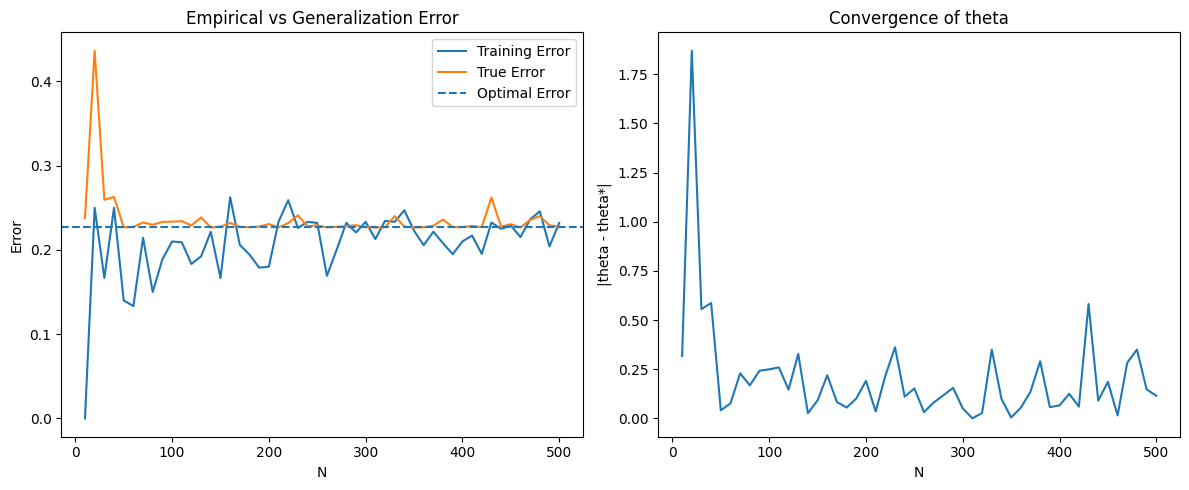

To stay within epsilon = 0.1 near theta*: ~ Not found


In [3]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

theta_star = 3.75


e1 = 1 - norm.cdf(theta_star, 3, 1)
e0 = norm.cdf(theta_star, 4.5, 1)

gen_error_star = 0.5*e0 + 0.5*e1

print("Generalization Error:", round(gen_error_star, 2))
print("Optimal Theta:", round(theta_star, 2))


N_values = list(range(10, 501, 10))

#E_Err = emprical Error
#G_err = generalization error
#T_diff = theta difference
E_err = []
G_err = []
T_diff = []


for n_val in N_values:

    y_temp = np.random.choice([0, 1], n_val)
    x_temp = []

    for label in y_temp:
        if label == 1:
            x_temp.append(np.random.normal(3, 1))
        else:
            x_temp.append(np.random.normal(4.5, 1))

    x_temp = np.array(x_temp)

    grid = np.linspace(min(x_temp), max(x_temp), 200)

    T_best = grid[0]
    min_error = 9999

    for t in grid:

        wrong = 0

        for i in range(n_val):
            if x_temp[i] < t:
                pred = 1
            else:
                pred = 0

            if pred != y_temp[i]:
                wrong += 1

        err = wrong/n_val

        if err < min_error:
            min_error = err
            T_best = t

    E_err.append(min_error)

    err1 = 1-norm.cdf(T_best, 3, 1)
    err0 = norm.cdf(T_best, 4.5, 1)
    true_err = 0.5 * err0 + 0.5* err1

    G_err.append(true_err)

    T_diff.append(abs(T_best - theta_star))


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(N_values, E_err, label="Training Error")
plt.plot(N_values, G_err, label="True Error")
plt.axhline(gen_error_star, linestyle="--", label="Optimal Error")
plt.xlabel("N")
plt.ylabel("Error")
plt.title("Empirical vs Generalization Error")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(N_values, T_diff)
plt.xlabel("N")
plt.ylabel("|theta - theta*|")
plt.title("Convergence of theta")

plt.tight_layout()
plt.show()

#cons_n = consistent value of n
epsilon = 0.1
cons_n = "Not found"

for i in range(len(T_diff)):

    if T_diff[i]<epsilon:

        ok = True
        for j in range(i, min(i+5, len(T_diff))):
            if T_diff[j] >= epsilon:
                ok = False
                break

        if ok:
            cons_n = N_values[i]
            break

print("To stay within epsilon =", epsilon, "near theta*: ~", cons_n)


**TASK 2**:                                                      **(50 Marks)**


Generate $n=30$ data points from function $f(x) = e^{(\pi x/8)} + \frac{x}{12\pi} + \text{noise}$ where noise$\sim \mathcal{N}(0,0.004)$ with $x$ ranging from $0$ to $10$.  **[3 Marks]**

1. Fit a polynomial regression with optimal weight vector $w^*$ computed via analytical method (using idea of matrices) and plot the curves for different degree of polynomials $M=2,4,5,7,10$. Explain your observations by plotting the data points generated and the curve obtained for different values of $M$.  **[3 Marks]**

2. Fit a polynomial regression using gradient descent for different degree of polynomials $M=2,4,5,7,10$. Explain your observations by plotting the data points generated and the curve obtained for different values of $M$.  **[5 Marks]**

      For Stochastic Gradient Descent refer: https://www.mit.edu/~gfarina/2024/67220s24_L10_sgd/L10.pdf


3. Repeat the previous experiments with more number of data points and report your findings. More specifically, compare the above two approaches with respect to the solution obtained with respect to each value of M. **[5 Marks]**

4. Plot runtime of both methods against variation with respect to $M$.
 **[3 Marks]**

5. Plot runtime of both methods against variation with respect to number of datapoints.  **[3 Marks]**

6. Fix the number of training samples to $n = 30$.
- For polynomial degrees $M \in \{5, 10, 15\}$, train polynomial regression models using $\ell_2$ regularization (ridge) and $\ell_1$ regularization (lasso).


  **For a polynomial hypothesis:**
$$
h_w(x) = \sum_{j=0}^M w_j x^j,
$$

           the ridge regression objective is
$$
\min_w \; \frac{1}{n}\sum_{i=1}^n \big(h_w(x_i) - y_i\big)^2
+ \lambda \sum_{j=1}^M w_j^2,
$$

            and the lasso regression objective is
$$
\min_w \; \frac{1}{n}\sum_{i=1}^n \big(h_w(x_i) - y_i\big)^2
+ \lambda \sum_{j=1}^M |w_j|.
$$
  Vary the regularization strength (i.e. regularization parameter $\lambda\in \{0.1,0.05,.01,.05,.001\}$) and plot the training and test MSE for each $M$.

  Fix the polynomial degree to $M = 10$.
- Vary the number of training samples $n \in \{20, 50, 100, 200\}$.
For each $n$, evaluate different regularization strengths and plot the test MSE as a function of the regularization parameter.**[10 Marks]**

7. Sample Complexity for Fixed Error
- Target test MSE $<0.05$
- For each $M=1,3,9$, find min $n$ over **20 runs** s.t. holds w.p. $>0.9$
- Relate to VC-dim $\approx M+1$: **plot** required $n$ vs. $M$. **[8 Marks]**


8. Non-Realizable Noise Comparison
- Add Poisson noise ($\lambda=0.1 |f(x)|$)
- With **20 runs**, $n=30$, $M=1$ to 15, plot mean/std train/test MSE vs. $M$
- Identify the best and worst $M$ for which the hypothesis underfit and overfit
- Discuss convergence to $\min R(h)$, where $R(h)$ denotes the true (population) risk of a hypothesis $h$ under squared loss. **[10 Marks]**

**Use of sci-kit or any direct implementation of linear regression is striclty probhibted. You can use numpy and pandas.**
Write your code by creating cells below.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from math import pi, exp

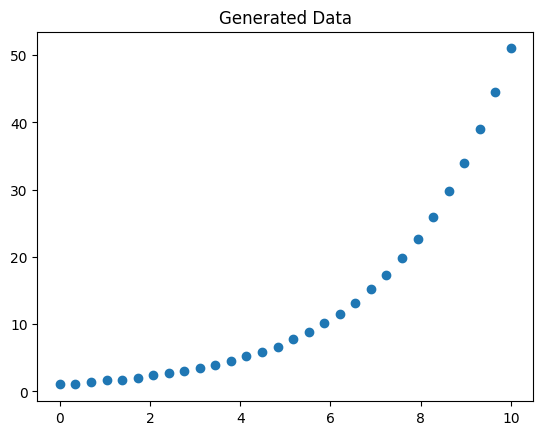

In [5]:
#code
np.random.seed(42)

n = 30
x = np.linspace(0, 10, n)

noise = np.random.normal(0, np.sqrt(0.004), n)

def f(x):
    return np.exp((pi * x) / 8) + x / (12 * pi)

y = f(x) + noise

plt.scatter(x, y)
plt.title("Generated Data")
plt.show()


In [6]:
#code
def design_matrix(x, M):
    X = []
    for xi in x:
        row = []
        for j in range(M+1):
            row.append(xi**j)
        X.append(row)
    return np.array(X)

In [7]:
def fit_analytical(x, y, M):
    X = design_matrix(x, M)
    XT = X.T
    w = np.linalg.inv(XT @ X) @ XT @ y
    return w

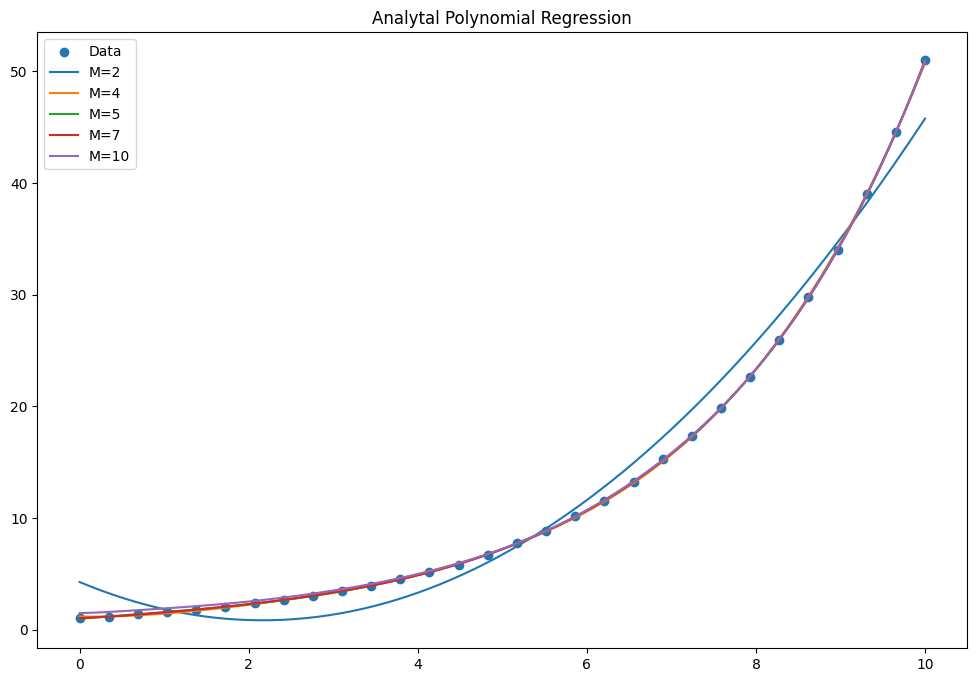

In [8]:
degrees = [2,4,5,7,10]

x_plot = np.linspace(0,10,300)

plt.figure(figsize=(12,8))
plt.scatter(x,y,label="Data")

for M in degrees:
    w = fit_analytical(x,y,M)
    Xp = design_matrix(x_plot,M)
    y_pred = Xp @ w
    plt.plot(x_plot,y_pred,label="M="+str(M))

plt.legend()
plt.title("Analytal Polynomial Regression")
plt.show()


In [9]:
def fit_gradient_descent(x,y,M,lr=0.001,epochs=5000):
    X = design_matrix(x,M)
    w = np.zeros(M+1)

    for _ in range(epochs):
        y_pred = X @ w
        grad = (2/len(x)) * (X.T @ (y_pred-y))
        w = w-lr*grad

    return w


/tmp/ipython-input-1441232226.py:7: RuntimeWarning: overflow encountered in matmul
  grad = (2/len(x)) * (X.T @ (y_pred-y))
/tmp/ipython-input-1441232226.py:6: RuntimeWarning: invalid value encountered in matmul
  y_pred = X @ w
/tmp/ipython-input-1441232226.py:6: RuntimeWarning: overflow encountered in matmul
  y_pred = X @ w


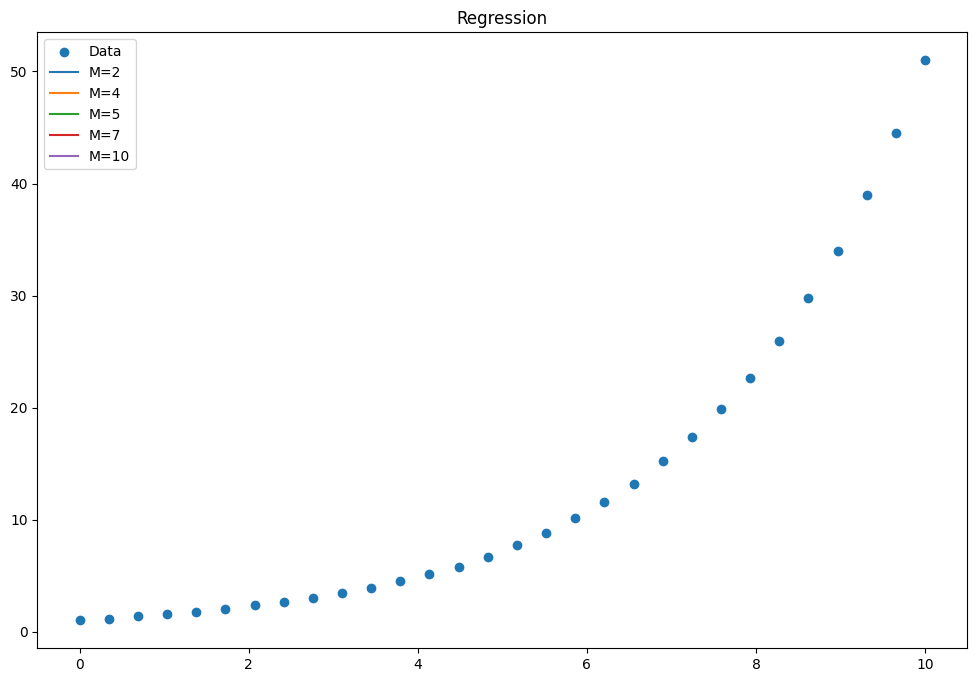

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(x,y,label="Data")

for M in degrees:
    w = fit_gradient_descent(x,y,M)
    Xp = design_matrix(x_plot,M)
    y_pred = Xp @ w
    plt.plot(x_plot,y_pred,label="M="+str(M))

plt.legend()
plt.title("Regression")
plt.show()

In [11]:
def experiment_with_n(n_val):
    x = np.linspace(0,10,n_val)
    y = f(x) + np.random.normal(0,np.sqrt(0.004),n_val)
    return x,y


/tmp/ipython-input-1441232226.py:7: RuntimeWarning: overflow encountered in matmul
  grad = (2/len(x)) * (X.T @ (y_pred-y))
/tmp/ipython-input-1441232226.py:6: RuntimeWarning: invalid value encountered in matmul
  y_pred = X @ w
/tmp/ipython-input-1441232226.py:6: RuntimeWarning: overflow encountered in matmul
  y_pred = X @ w


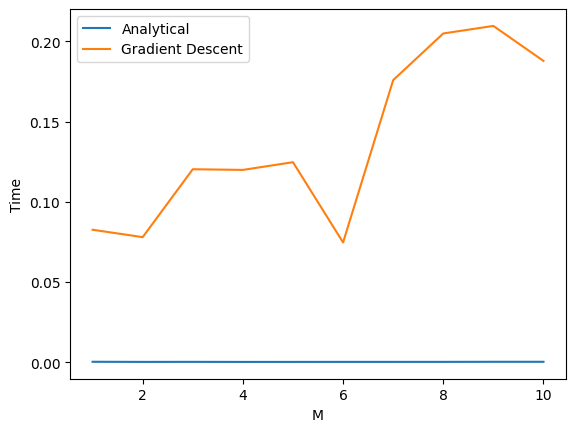

In [12]:
Ms = range(1,11)
T_ana = []
T_gd = []

for M in Ms:
    start = time.time()
    fit_analytical(x,y,M)
    T_ana.append(time.time()-start)

    start = time.time()
    fit_gradient_descent(x,y,M)
    T_gd.append(time.time()-start)

plt.plot(Ms,T_ana,label="Analytical")
plt.plot(Ms,T_gd,label="Gradient Descent")
plt.legend()
plt.xlabel("M")
plt.ylabel("Time")
plt.show()

/tmp/ipython-input-1441232226.py:7: RuntimeWarning: overflow encountered in matmul
  grad = (2/len(x)) * (X.T @ (y_pred-y))
/tmp/ipython-input-1441232226.py:6: RuntimeWarning: invalid value encountered in matmul
  y_pred = X @ w


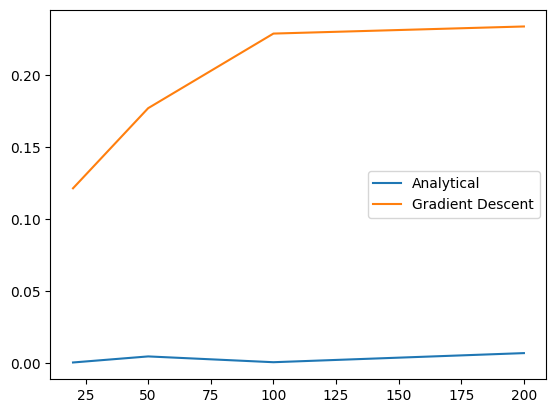

In [13]:
ns = [20,50,100,200]

t1=[]
t2=[]

for n_val in ns:
    x_temp,y_temp = experiment_with_n(n_val)

    start=time.time()
    fit_analytical(x_temp,y_temp,5)
    t1.append(time.time()-start)

    start=time.time()
    fit_gradient_descent(x_temp,y_temp,5)
    t2.append(time.time()-start)

plt.plot(ns,t1,label="Analytical")
plt.plot(ns,t2,label="Gradient Descent")
plt.legend()
plt.show()

In [14]:
def fit_ridge(x,y,M,lmbd):
    X=design_matrix(x,M)
    I=np.identity(M+1)
    I[0,0]=0
    w=np.linalg.inv(X.T@X + lmbd*I)@X.T@y
    return w


In [15]:
def fit_lasso(x,y,M,lmbd,lr=0.001,epochs=3000):
    X=design_matrix(x,M)
    w=np.zeros(M+1)

    for _ in range(epochs):
        y_pred=X@w
        grad=(2/len(x))*X.T@(y_pred-y)+lmbd*np.sign(w)
        grad[0]-=lmbd*np.sign(w[0])
        w=w-lr*grad
    return w


In [16]:
def mse(y,yhat):
    return np.mean((y-yhat)**2)


In [17]:
def generate_poisson_data():
    y_clean = f(x)
    noise = np.random.poisson(0.1*np.abs(y_clean))
    return y_clean + noise


**TASK 3**:                                                      **(50 Marks)**

Consider the hypothesis class  
$$
\mathcal{H} = \{ h_{a,b} : [0,1]^2 \rightarrow \{0,1\} \mid h_{a,b}(x_1,x_2) = \mathbf{1}[x_1 \le a \ \text{and}\ x_2 \ge b],\ a,b \in [0,1] \}.
$$

Points are sampled i.i.d. from the uniform distribution over $[0,1]^2$.  
The true labeling function is realizable and given by  
$$
h^* = h_{0.3,\,0.7}.
$$



---

Subtask 3a: Dataset Generation and ERM Finder:

- Generate $n$ i.i.d. samples $(X_i, y_i)$, where  
  $X_i \sim \text{Uniform}([0,1]^2)$ and $y_i = h^*(X_i)$.
- Implement an ERM (Empirical Risk Minimization) procedure that finds parameters $(\hat{a}, \hat{b})$ minimizing the empirical risk
  $$
  \hat{R}(h_{a,b}) = \frac{1}{n}\sum_{i=1}^n \mathbf{1}[h_{a,b}(X_i) \neq y_i].
  $$
- Restrict the search to candidate thresholds induced by the data:  
  $a$ values from observed $x$-coordinates and $b$ values from observed $y$-coordinates. **[10 Marks]**

**Expected Output:**  
Estimated values $\hat{a}$, $\hat{b}$, and the corresponding empirical error.

---

Subtask 3b: Error Convergence with Number of Samples:

- Treat the hypothesis class as finite due to data-dependent boundaries $(|\mathcal{H}| \le n^2)$.
- For sample sizes  
  $n \in \{10, 20, 50, 100, 200, 500, 1000\}$,  
  repeat the experiment 20 times.
- For each run, compute:
  - Empirical risk of the ERM hypothesis
  - True risk with respect to the uniform distribution over $[0,1]^2$

- Report the mean and standard deviation of both errors across runs.
- Plot empirical error and true error versus $n$ with error bars. **[10 Marks]**

**Expected Output:**  
A plot showing convergence of empirical and true errors, along with brief observations on underfitting for small $n$ and convergence to zero error.

---

Subtask 3c: Sample Complexity Bound Verification:

- **Theoretical:**  
  Using uniform convergence for finite hypothesis classes with $|\mathcal{H}| \le n^2$, compute the sample complexity required to achieve  
  $\epsilon = 0.05$ and $\delta = 0.05$.
- **Empirical:**  
  Estimate the smallest $n$ such that the true error is below $0.05$ with probability at least $0.95$, based on 50 independent runs.
     **[10 Marks]**

**Expected Output:**  
Theoretical sample complexity bound, empirical estimate of required sample size, and a short comparison between them.

---

Subtask 3d: Non-Realizable (Noisy) Case:

- Introduce label noise according to:
  $$
  \mathbb{P}(y=1 \mid X=x) =
  \begin{cases}
  0.8, & \text{if } h^*(x)=1 \\
  0.2, & \text{if } h^*(x)=0
  \end{cases}
  $$
- Fix $n = 1000$.
- Repeat the experiment from Subtask 3b and compare results with the realizable case.
- Plot empirical and true risks for both settings.

- Discuss why zero error is no longer achievable and how ERM converges to the minimum possible risk in the agnostic setting.     **[10 Marks]**

**Expected Output:**  
A comparative plot and a concise discussion on realizable vs. agnostic learning behavior.


In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:

a = 0.3
b = 0.7

def h_star(x):
    if x[0] <= a and x[1] >= b:
        return 1
    else:
        return 0

In [20]:
def generate_data(n):
    X = np.random.uniform(0, 1, (n, 2))
    y = ((X[:, 0] <= 0.3) & (X[:, 1] >= 0.7)).astype(int)
    return X, y

In [21]:
def h_ab(x, a, b):
    if x[0] <= a and x[1] >= b:
        return 1
    else:
        return 0

In [22]:
def erm_find_ab(X, y):
    n = len(X)
    a_values = X[:, 0]
    b_values = X[:, 1]

    b_err = 1.0
    a_best = 0
    b_best = 0

    for a in a_values:
        mask_a = (X[:, 0] <= a)
        for b in b_values:
            preds = mask_a & (X[:, 1] >= b)
            emp_risk = np.mean(preds != y)

            if emp_risk < b_err:
                b_err = emp_risk
                a_best = a
                b_best = b
                if b_err == 0: return a_best, b_best, b_err

    return a_best, b_best, b_err

In [23]:
np.random.seed(0)

X, y = generate_data(100)

a_hat, b_hat, emp_error = erm_find_ab(X, y)

print("Aprxm a:", round(a_hat, 3))
print("Aprxm b:", round(b_hat, 3))
print("empirical error:", emp_error)

Aprxm a: 0.265
Aprxm b: 0.715
empirical error: 0.0


In [24]:
def true_risk(a_h, b_h, num_samples=1000):
    X_test = np.random.uniform(0, 1, (num_samples, 2))
    y_true = ((X_test[:, 0] <= 0.3) & (X_test[:, 1] >= 0.7)).astype(int)
    y_pred = ((X_test[:, 0] <= a_h) & (X_test[:, 1] >= b_h)).astype(int)

    return np.mean(y_true != y_pred)

In [25]:
n_values = [10, 20, 50, 100, 200]
em, es, tm, ts = [], [], [], []

for n in n_values:
    e_err, t_err = [], []
    print(f"Running for n = {n}...")

    for run in range(20):
        X, y = generate_data(n)
        a_h, b_h, emp_err = erm_find_ab(X, y)
        te = true_risk(a_h, b_h)

        e_err.append(emp_err)
        t_err.append(te)

    em.append(np.mean(e_err))
    es.append(np.std(e_err))
    tm.append(np.mean(t_err))
    ts.append(np.std(t_err))

Running for n = 10...
Running for n = 20...
Running for n = 50...
Running for n = 100...
Running for n = 200...


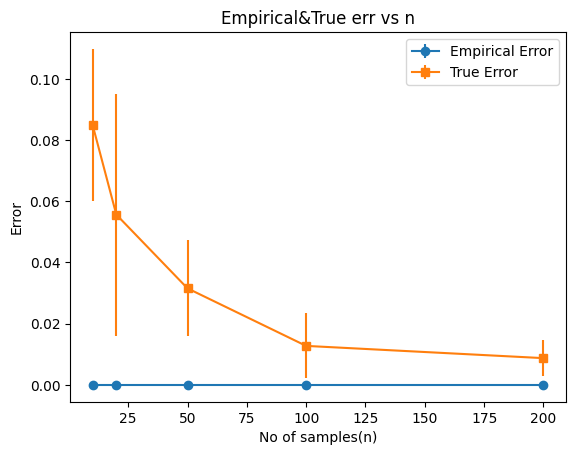

In [26]:
#CODE

plt.errorbar(n_values, em, yerr=es, label="Empirical Error", marker='o')
plt.errorbar(n_values, tm, yerr=ts, label="True Error", marker='s')

plt.xlabel("No of samples(n)")
plt.ylabel("Error")
plt.title("Empirical&True err vs n")
plt.legend()
plt.show()


In [27]:
epsilon = 0.05
delta = 0.05

def theoretical_n(epsilon, delta):

    n = 100
    for _ in range(10):
        n = (1/epsilon)* (2*np.log(n)+np.log(1/delta))
    return int(n)

print("Theoretical n ≈", theoretical_n(epsilon, delta))

Theoretical n ≈ 286


In [28]:
def empirical_min_n(threshold=0.05):
    for n in range(50, 2000, 50):
        successes = 0

        for run in range(50):
            X, y = generate_data(n)
            a_hat, b_hat, _ = erm_find_ab(X, y)
            tr = true_risk(a_hat, b_hat)

            if tr < threshold:
                successes += 1

        if successes / 50 >= 0.95:
            return n

    return None

print("Empirical required n:", empirical_min_n())

Empirical required n: 100


In [29]:
def generate_noisy_data(n):
    X = np.random.uniform(0, 1, (n, 2))
    y_true = ((X[:, 0] <= 0.3) & (X[:, 1] >= 0.7)).astype(int)
    flip = np.random.random(n) < 0.2
    y = np.where(flip, 1 - y_true, y_true)
    return X, y

In [30]:
n = 200
runs = 20

emp_real = []
true_real = []
emp_noisy = []
true_noisy = []

for _ in range(runs):
    # Realizable
    X, y = generate_data(n)
    a,b,emp = erm_find_ab(X,y)
    emp_real.append(emp)
    true_real.append(true_risk(a,b))

    # Noisy
    Xn, yn = generate_noisy_data(n)
    a,b,emp = erm_find_ab(Xn,yn)
    emp_noisy.append(emp)
    true_noisy.append(true_risk(a,b))


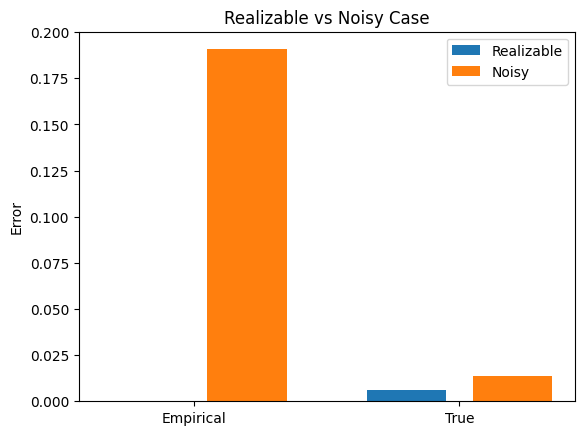

In [31]:
labels = ["Empirical", "True"]

plt.bar([0,1], [np.mean(emp_real), np.mean(true_real)], width=0.3, label="Realizable")
plt.bar([0.4,1.4], [np.mean(emp_noisy), np.mean(true_noisy)], width=0.3, label="Noisy")

plt.xticks([0.2,1.2], labels)
plt.ylabel("Error")
plt.title("Realizable vs Noisy Case")
plt.legend()
plt.show()